**Importing Dependencies**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

**Data Collection And Analysis**

In [3]:
## Loading the dataset
customer_data = pd.read_csv('Mall_Customers.csv')
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
## Changing the column names
customer_data.columns=["CustomerID","Gender","Age","Annual Income","Spending Score"]
customer_data

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
## Getting information about dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
## Checking the shape of the dataset
customer_data.shape

(200, 5)

In [7]:
## Checking the missing values
customer_data.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

**Choosing The Annual Income And Spending Score Columns**

In [9]:
X = customer_data.iloc[:,3:]
X

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [10]:
print(X.head())

   Annual Income  Spending Score
0             15              39
1             15              81
2             16               6
3             16              77
4             17              40


<Axes: >

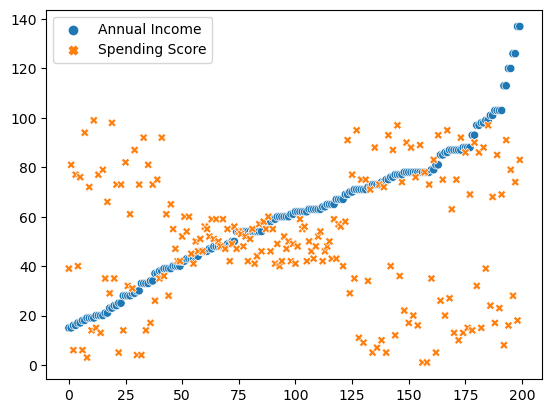

In [11]:
sns.scatterplot(X)

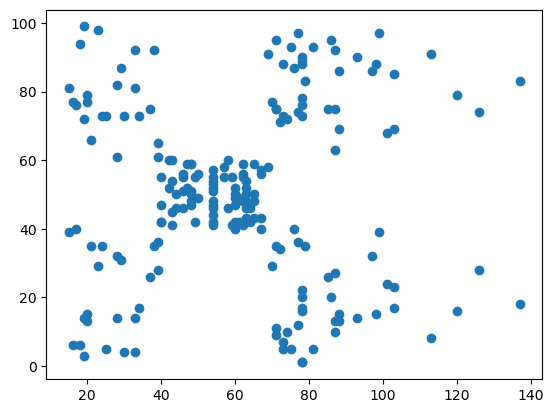

In [12]:
plt.scatter(X['Annual Income'],X['Spending Score'])

**Choosing The Number Of Clusters**


**WCSS --> Within Cluster Sum Of Squares**


In [15]:
## Finding WCSS value for different number of clusters

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

D:\IDE\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\IDE\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\IDE\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\IDE\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads.

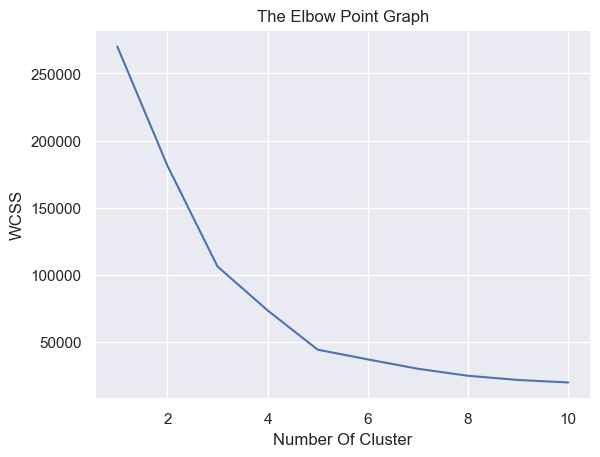

In [16]:
## Plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number Of Cluster')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

**Training the K-means Clustering Model**

In [29]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

D:\IDE\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\IDE\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


**Visualizing All The Clusters**

In [31]:
print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [32]:
import numpy as np
import pandas as pd

# Only convert if it's a pandas object
if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
    X = X.to_numpy()
if isinstance(Y, pd.DataFrame) or isinstance(Y, pd.Series):
    Y = Y.to_numpy()

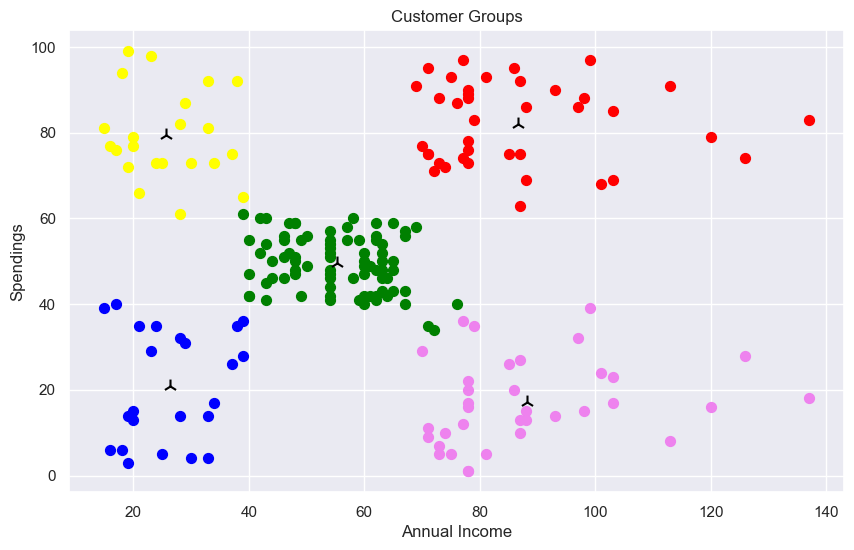

In [44]:
# Plotting all the clusters and their Centroids

plt.figure(figsize=(10,6))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green', label = 'Cluster1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red', label = 'Cluster2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow', label = 'Cluster3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='violet', label = 'Cluster4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='blue', label = 'Cluster5')

# Plot the Centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', marker='2', label='Centroids')

plt.title('Customer Groups')
plt.xlabel("Annual Income")
plt.ylabel("Spendings")
plt.show()